<a href="https://colab.research.google.com/github/RubenGres/Seg2Sat/blob/main/Seg2Sat_inference_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook from the [Seg2Sat model](https://github.com/RubenGres/Seg2Sat)

In [ ]:
!pip install diffusers
!pip install transformers
!pip install accelerate

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image
import torch

In [9]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

controlnet = ControlNetModel.from_pretrained("rgres/sd-controlnet-aerialdreams", torch_dtype=torch.float16).to(device)

pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-base", controlnet=controlnet, torch_dtype=torch.float16
).to(device)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [10]:
seg_url = "https://raw.githubusercontent.com/RubenGres/Seg2Sat/main/images/drawn_1/mask.png"
image = load_image(seg_url)

image = pipe(
   prompt="High resolution image, 4K, ultra detailed, aerial view of 31 Rue Molière, France.", num_inference_steps=20, image=image
).images[0]


  0%|          | 0/20 [00:00<?, ?it/s]

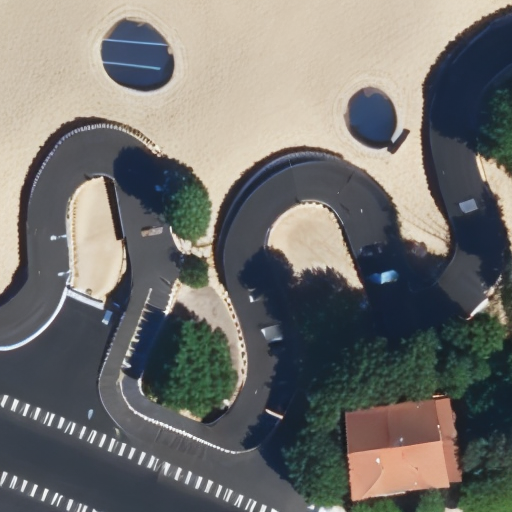

In [12]:
image